In [1]:
def is_running_in_colab():
    try:
        import google.colab
        !pip install nibabel nilearn dipy
        from google.colab import drive
        drive.mount('/content/drive')
        %pip install fslpy
        return True
    except ImportError:
        return False

In [2]:
%%capture
COLAB = is_running_in_colab()

In [ ]:
import os
import os.path as op
from tqdm.notebook import trange, tqdm
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from sklearn.decomposition import FastICA, PCA
username = os.getlogin()
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from scipy.stats import zscore
from scipy.io import loadmat
from IPython.display import Image

%matplotlib inline

In [ ]:
local = "./data/" if "nicolas" in username else "/home/jovyan/Data"
data_path = "/content/drive/MyDrive/NSSP/data/" if COLAB else local
dataset_id = "ds000171"
subject_id = "sub-control01"
fmri_path = op.join(data_path, dataset_id, "derivatives" , "preprocessed_data", subject_id, "func" ,f"{subject_id}_task-music_concat_bold_moco_bbr_std_smoothed-6mm.nii.gz")
anat_path = op.join(data_path, dataset_id, "derivatives" , "preprocessed_data", subject_id, "anat" ,f"{subject_id}_T1w_mni.nii.gz")
betted_mni_path = op.join(data_path, dataset_id, "derivatives" , "preprocessed_data", subject_id, "anat" ,f"{subject_id}_T1w_mni_mask.nii.gz")


In [ ]:
T1w_img = nib.load(anat_path)


In [ ]:
masker = NiftiMasker()
masker.fit(T1w_img)


NiftiMasker()

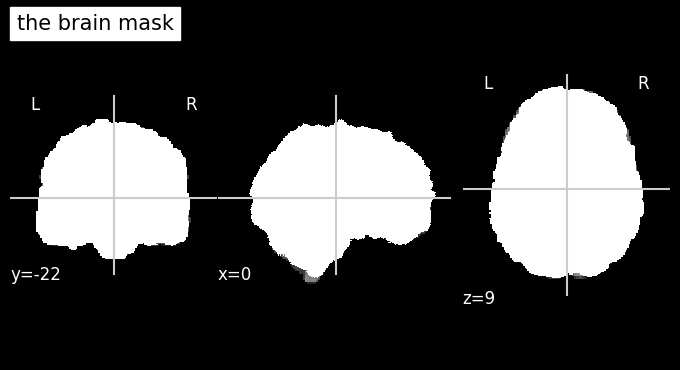

In [ ]:
plot_stat_map(masker.mask_img_, black_bg=True, title='the brain mask', colorbar=False,)

In [ ]:
img = nib.load(fmri_path)

In [ ]:
samples = img.get_fdata()
del img
samples.shape

(182, 218, 182, 315)

In [ ]:
mask = masker.mask_img_.get_fdata().astype(bool)

In [ ]:
mask_first = True


In [ ]:
v_shape = samples.shape

In [ ]:
if mask_first:
  samples = samples[mask,:]
else:
  samples = samples[...,:105].reshape(-1, 105)
samples.shape

(1992488, 315)

## 2 Components

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import FastICA
ica_comp = 2
## First: use ICA on the SPATIAL axis
icas = FastICA(n_components=ica_comp, random_state=9)
icasig_space = icas.fit_transform(samples)  # Spatial source signals

## Then apply again ICA but on the temporal axis
icat = FastICA(n_components=ica_comp, random_state=9) #, random_state=9
icasig_time = icat.fit_transform(samples.T)  # Temporal source signals

In [ ]:
if mask_first :
  icasig_space_r = np.zeros((v_shape[0], v_shape[1], v_shape[2], ica_comp)) # List of spatial components (you should have in the list volumes)
  icasig_space_r[mask,:] = icasig_space
else:
  new_shape = (v_shape[0], v_shape[1], v_shape[2], ica_comp)
  icasig_space_r = icasig_space.reshape(new_shape)

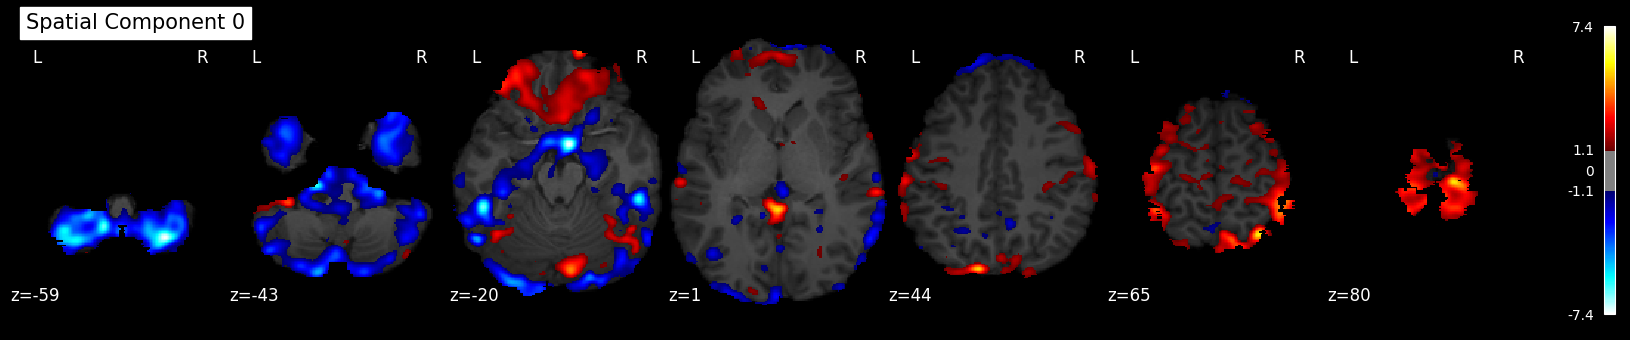

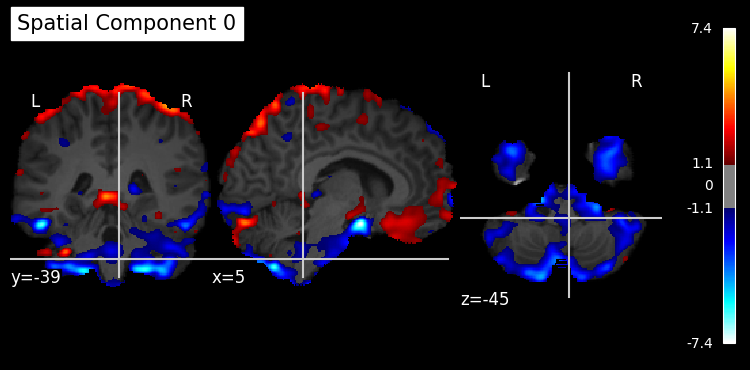

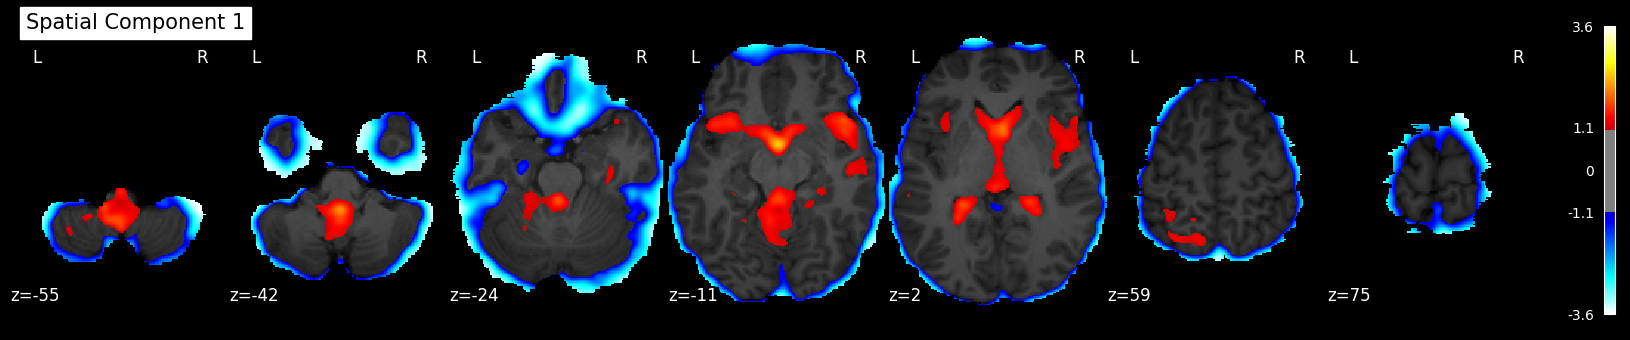

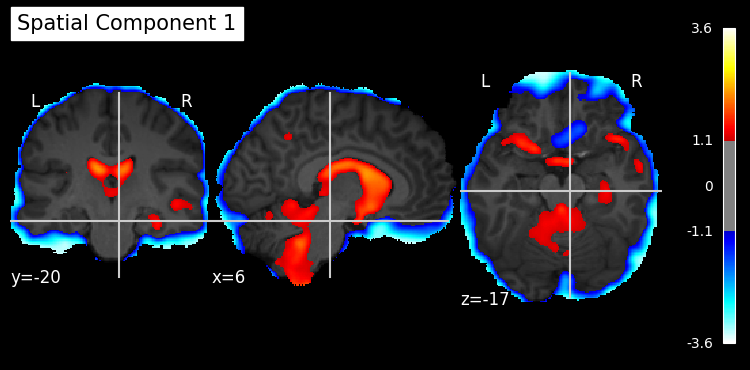

In [ ]:
desired_views = ['z', 'ortho']
for c in range(ica_comp):
  img = nib.Nifti1Image(icasig_space_r[...,c], T1w_img.affine)
  masked = masker.transform_single_imgs(img)
  img = masker.inverse_transform(masked)
  for view_ in desired_views:
    plot_stat_map(img, display_mode=view_, title=f'Spatial Component {c}',
                  colorbar=True, black_bg=True, bg_img=T1w_img, threshold=2*np.std(icasig_space_r[...,c]),)

## 3 Component

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import FastICA
ica_comp = 3
## First: use ICA on the SPATIAL axis
icas = FastICA(n_components=ica_comp, random_state=9)
icasig_space = icas.fit_transform(samples)  # Spatial source signals

## Then apply again ICA but on the temporal axis
icat = FastICA(n_components=ica_comp, random_state=9) #, random_state=9
icasig_time = icat.fit_transform(samples.T)  # Temporal source signals

In [ ]:
if mask_first :
  icasig_space_r = np.zeros((v_shape[0], v_shape[1], v_shape[2], ica_comp)) # List of spatial components (you should have in the list volumes)
  icasig_space_r[mask,:] = icasig_space
else:
  new_shape = (v_shape[0], v_shape[1], v_shape[2], ica_comp)
  icasig_space_r = icasig_space.reshape(new_shape)

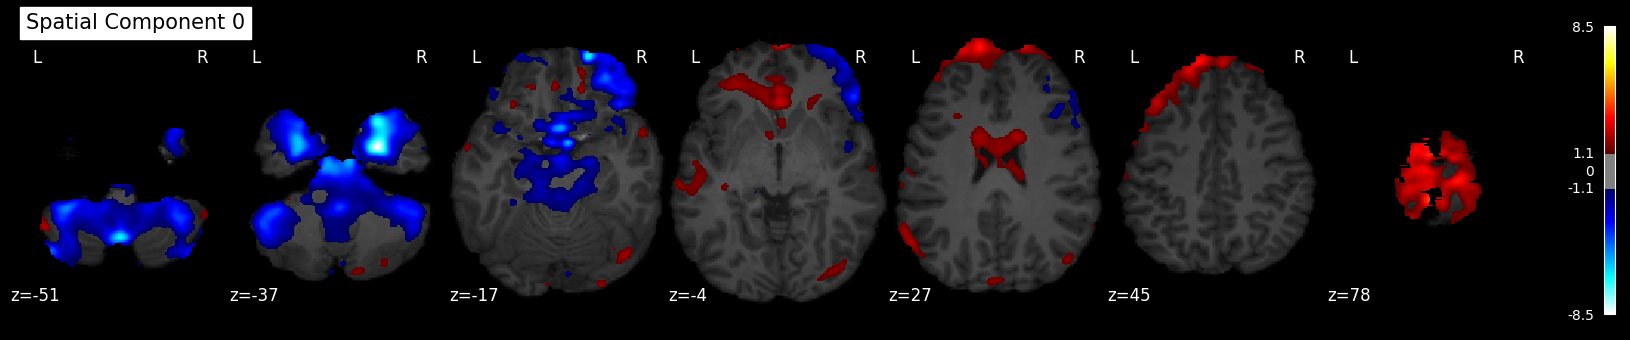

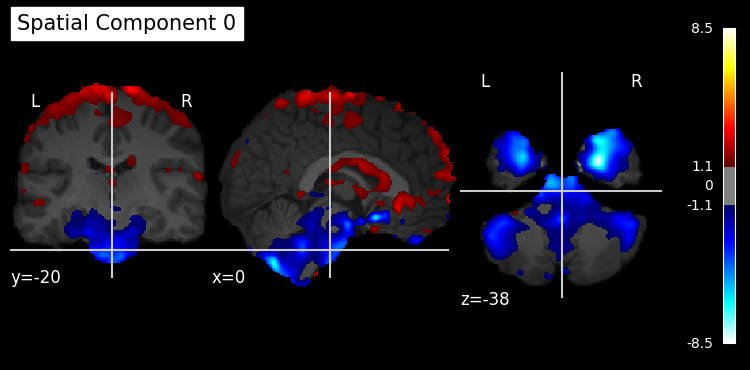

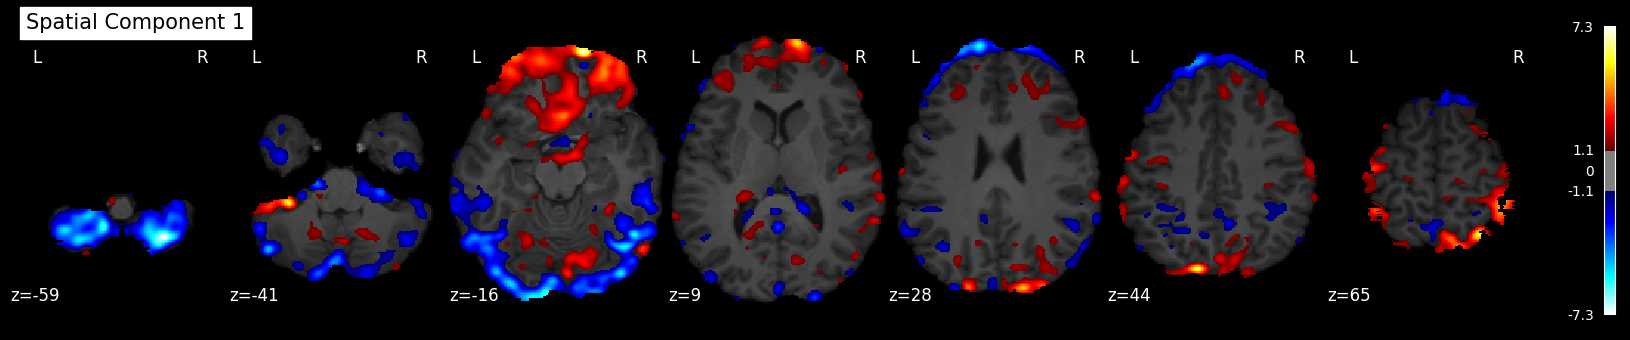

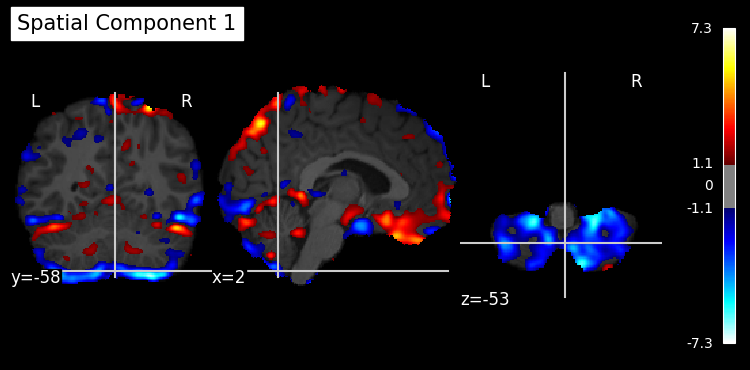

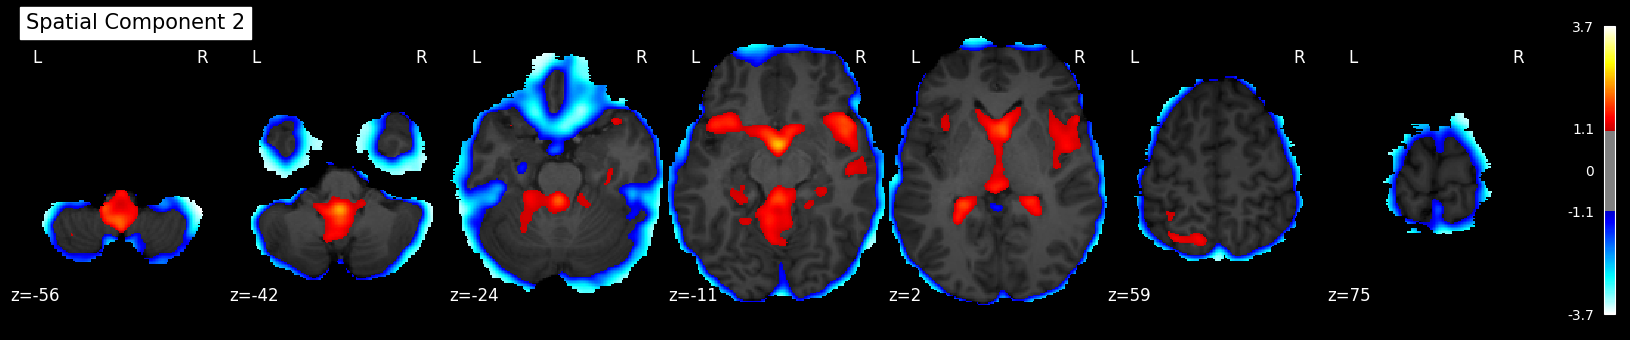

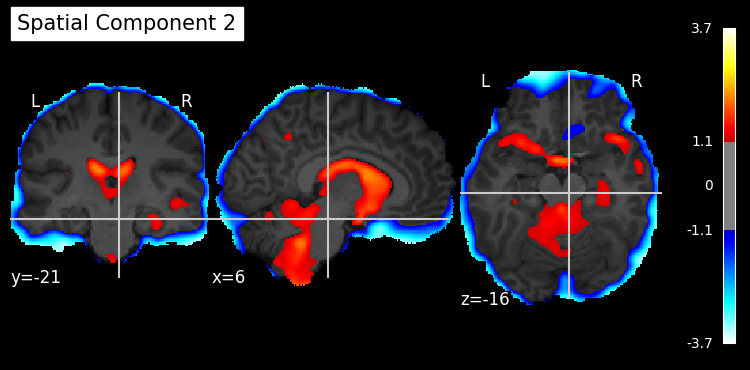

In [ ]:
desired_views = ['z', 'ortho']
for c in range(ica_comp):
  img = nib.Nifti1Image(icasig_space_r[...,c], T1w_img.affine)
  masked = masker.transform_single_imgs(img)
  img = masker.inverse_transform(masked)
  for view_ in desired_views:
    plot_stat_map(img, display_mode=view_, title=f'Spatial Component {c}',
                  colorbar=True, black_bg=True, bg_img=T1w_img, threshold=2*np.std(icasig_space_r[...,c]),)

## 4 Component

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import FastICA
ica_comp = 4
## First: use ICA on the SPATIAL axis
icas = FastICA(n_components=ica_comp, random_state=9)
icasig_space = icas.fit_transform(samples)  # Spatial source signals

## Then apply again ICA but on the temporal axis
icat = FastICA(n_components=ica_comp, random_state=9) #, random_state=9
icasig_time = icat.fit_transform(samples.T)  # Temporal source signals

In [ ]:
if mask_first :
  icasig_space_r = np.zeros((v_shape[0], v_shape[1], v_shape[2], ica_comp)) # List of spatial components (you should have in the list volumes)
  icasig_space_r[mask,:] = icasig_space
else:
  new_shape = (v_shape[0], v_shape[1], v_shape[2], ica_comp)
  icasig_space_r = icasig_space.reshape(new_shape)

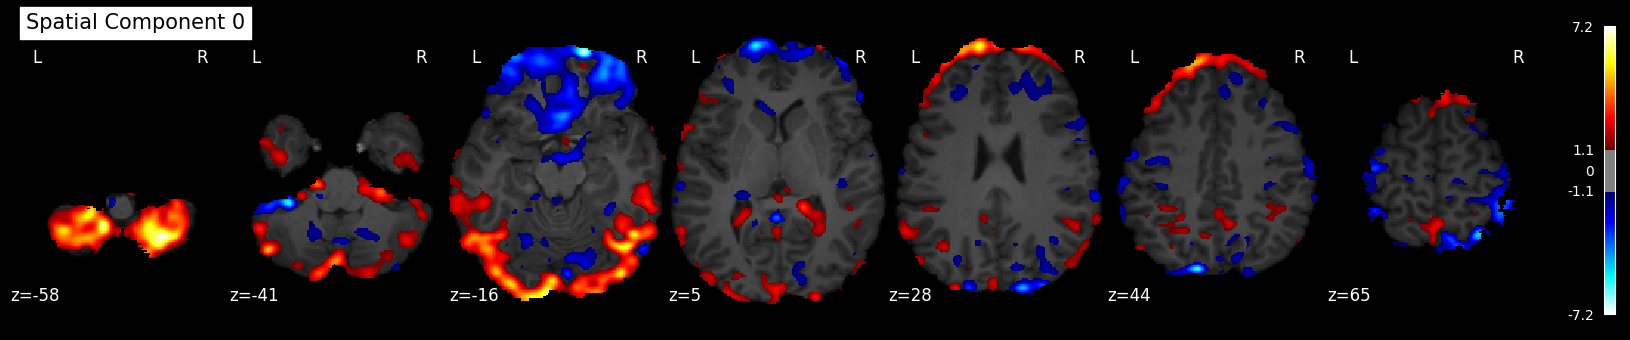

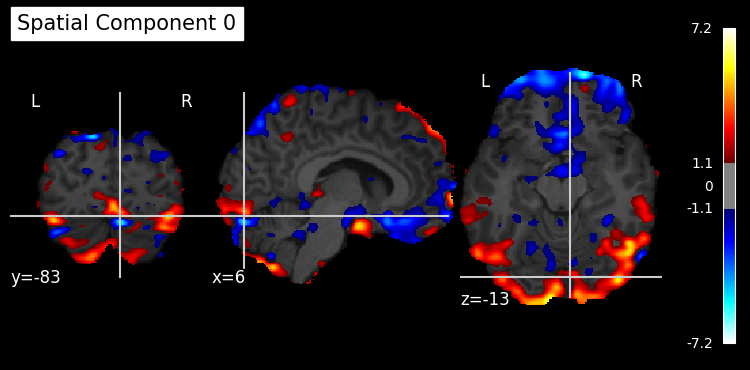

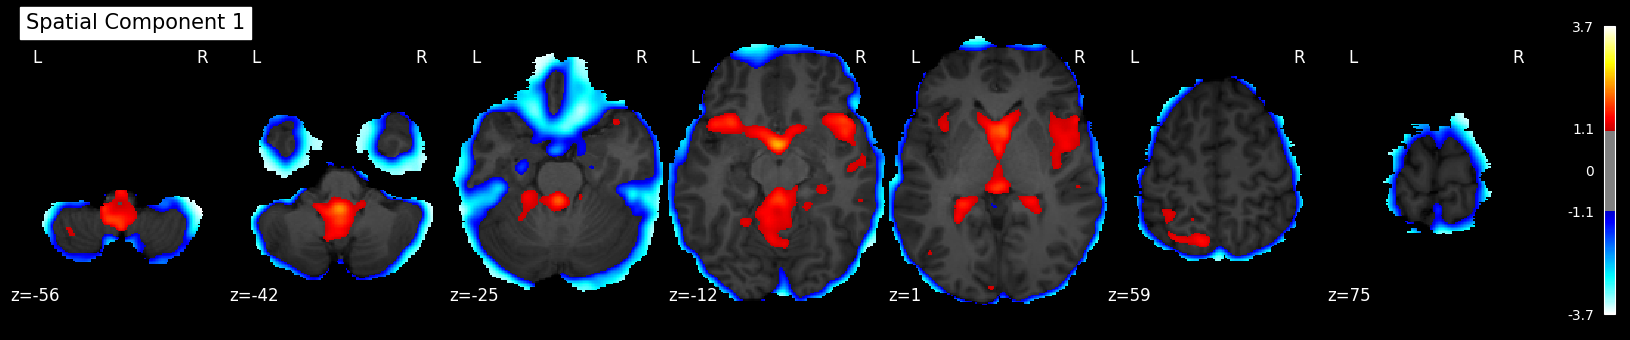

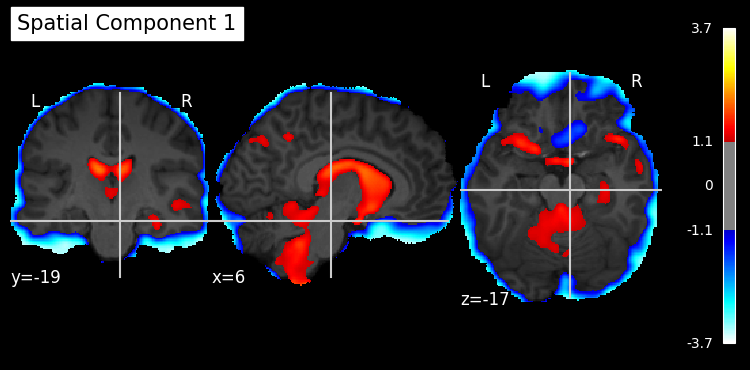

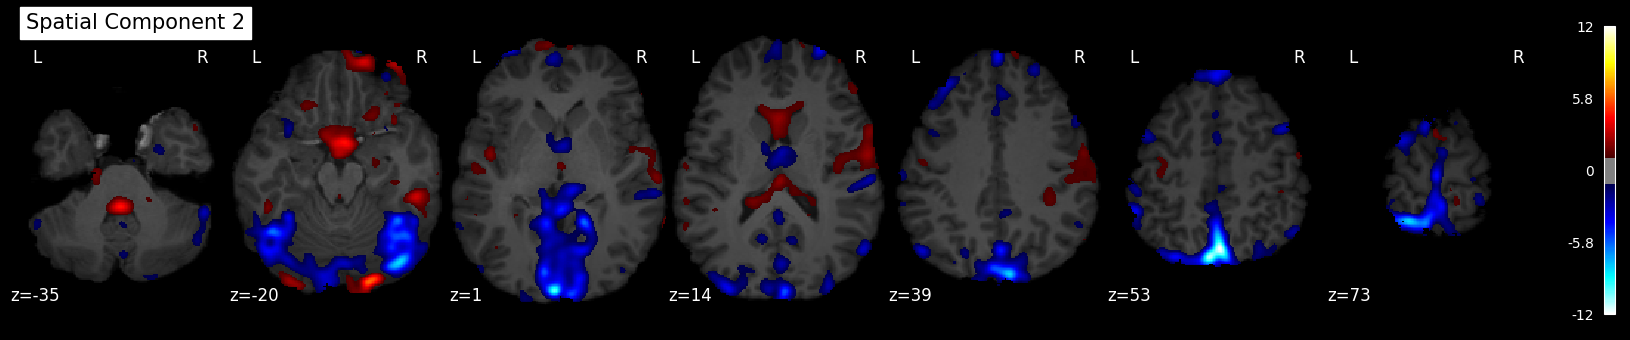

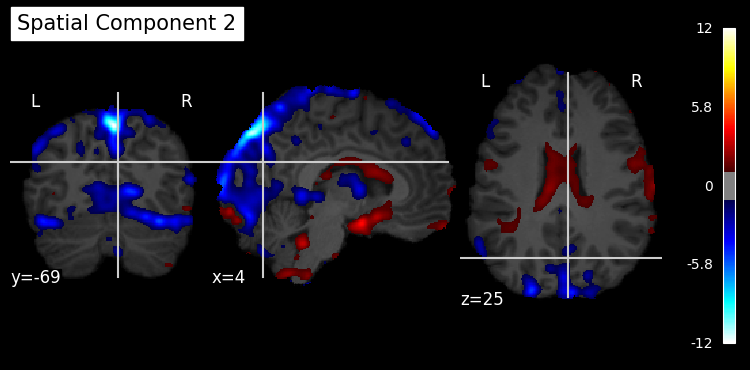

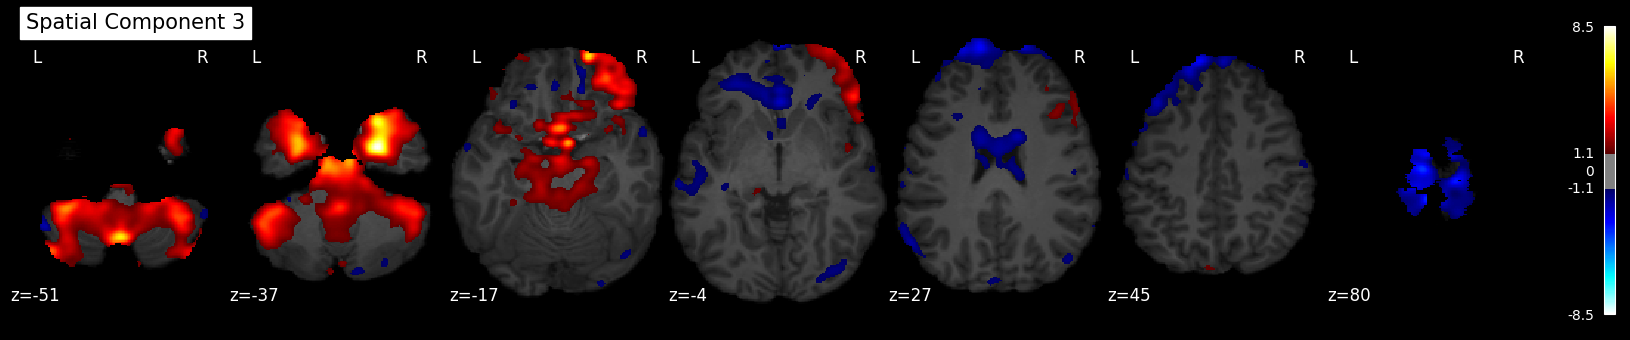

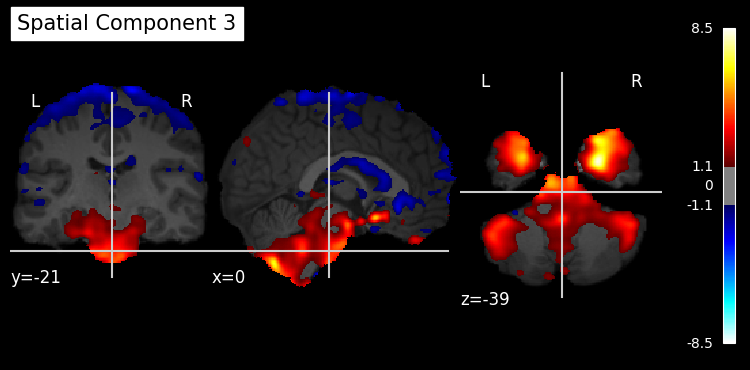

In [ ]:
desired_views = ['z', 'ortho']
for c in range(ica_comp):
  img = nib.Nifti1Image(icasig_space_r[...,c], T1w_img.affine)
  masked = masker.transform_single_imgs(img)
  img = masker.inverse_transform(masked)
  for view_ in desired_views:
    plot_stat_map(img, display_mode=view_, title=f'Spatial Component {c}',
                  colorbar=True, black_bg=True, bg_img=T1w_img, threshold=2*np.std(icasig_space_r[...,c]),)

## 5 Components

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import FastICA
ica_comp = 5
## First: use ICA on the SPATIAL axis
icas = FastICA(n_components=ica_comp, random_state=9)
icasig_space = icas.fit_transform(samples)  # Spatial source signals

## Then apply again ICA but on the temporal axis
icat = FastICA(n_components=ica_comp, random_state=9) #, random_state=9
icasig_time = icat.fit_transform(samples.T)  # Temporal source signals

In [ ]:
if mask_first :
  icasig_space_r = np.zeros((v_shape[0], v_shape[1], v_shape[2], ica_comp)) # List of spatial components (you should have in the list volumes)
  icasig_space_r[mask,:] = icasig_space
else:
  new_shape = (v_shape[0], v_shape[1], v_shape[2], ica_comp)
  icasig_space_r = icasig_space.reshape(new_shape)

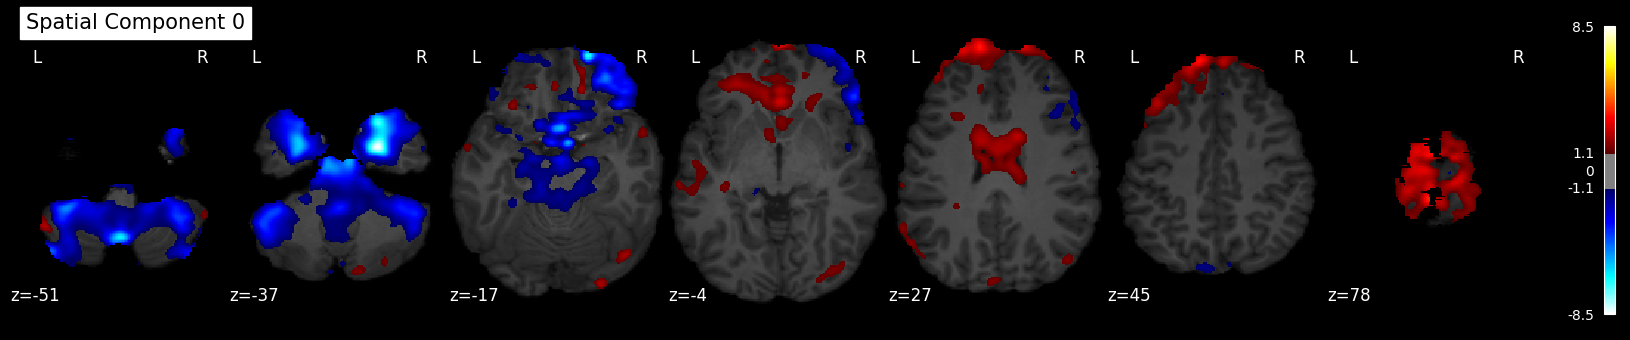

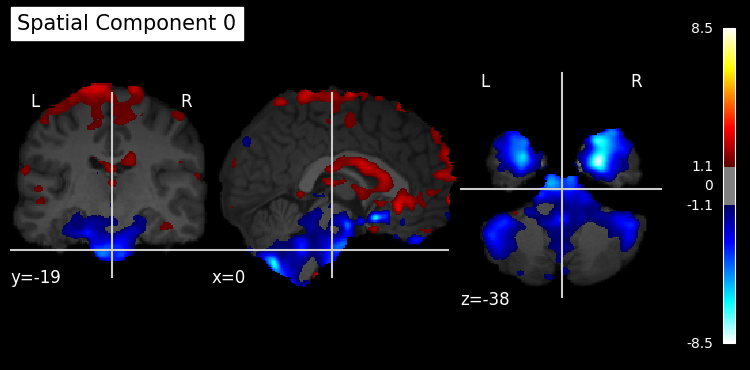

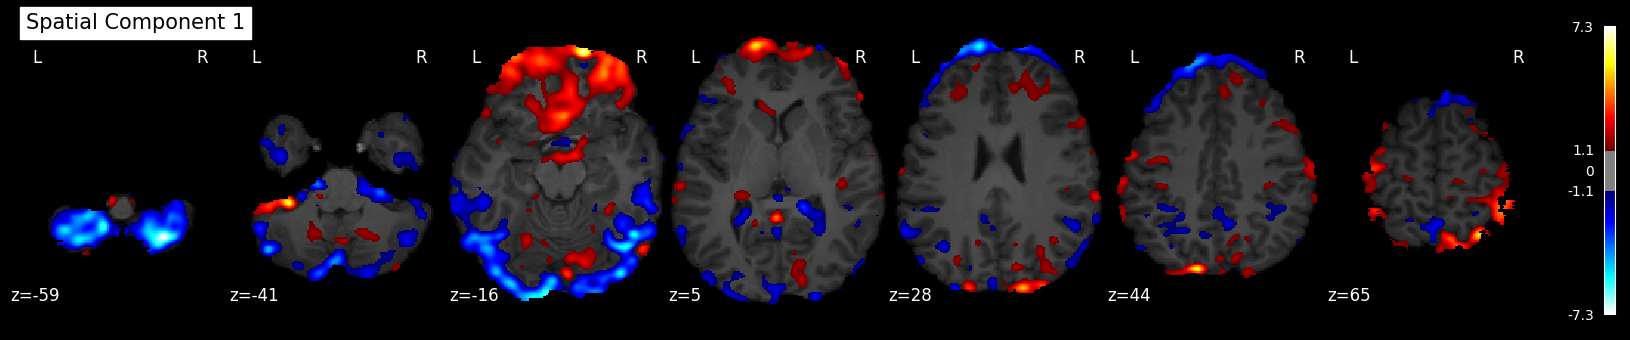

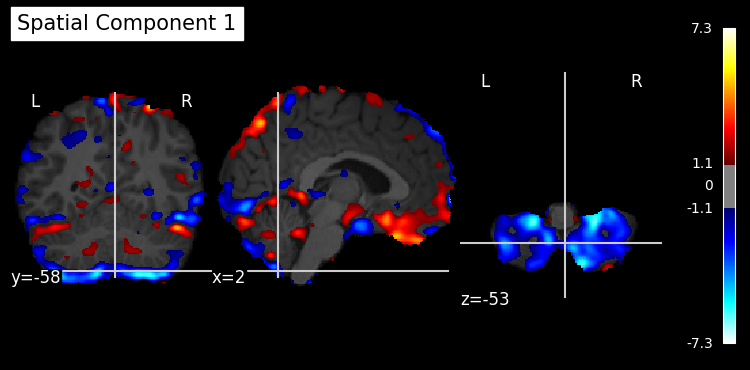

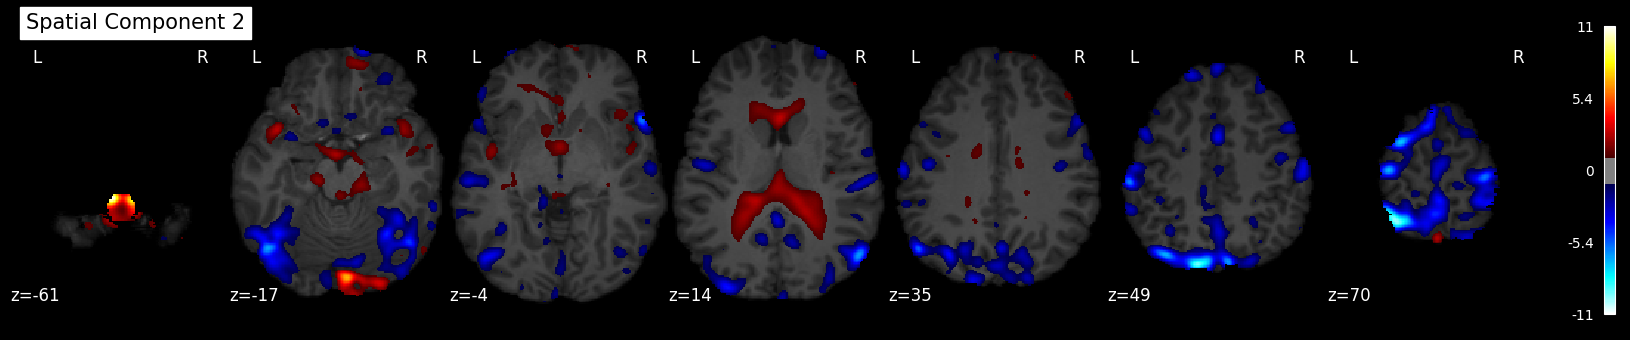

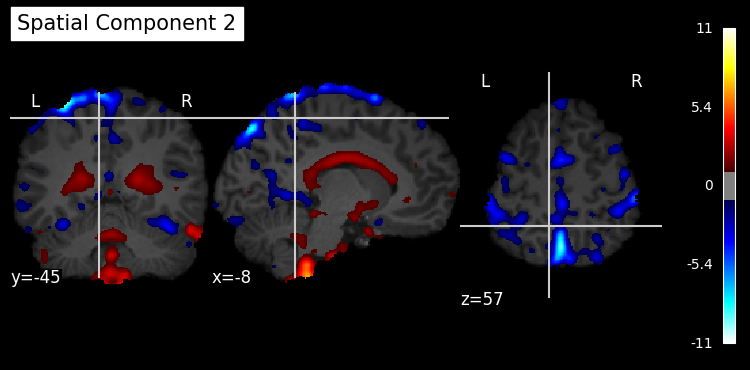

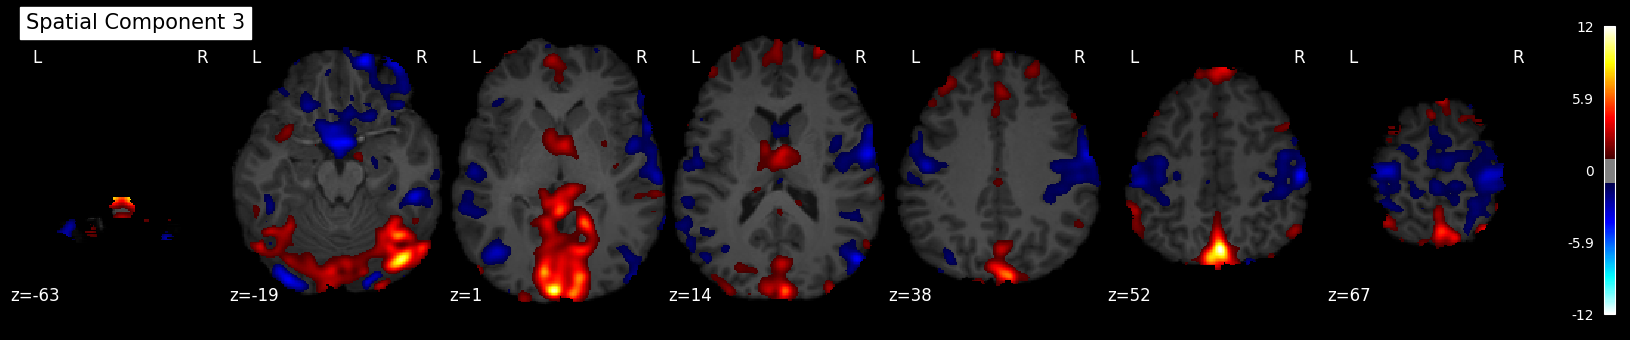

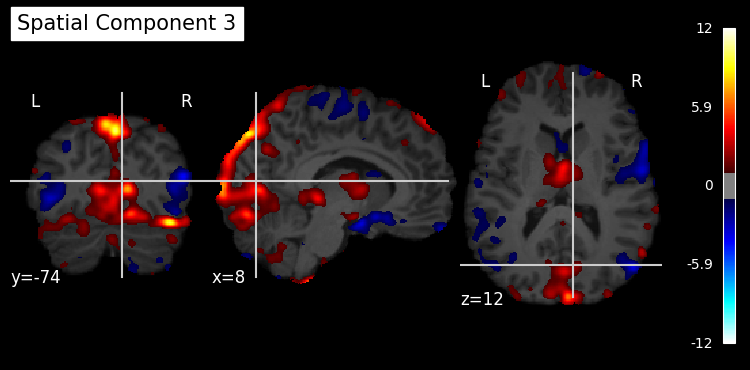

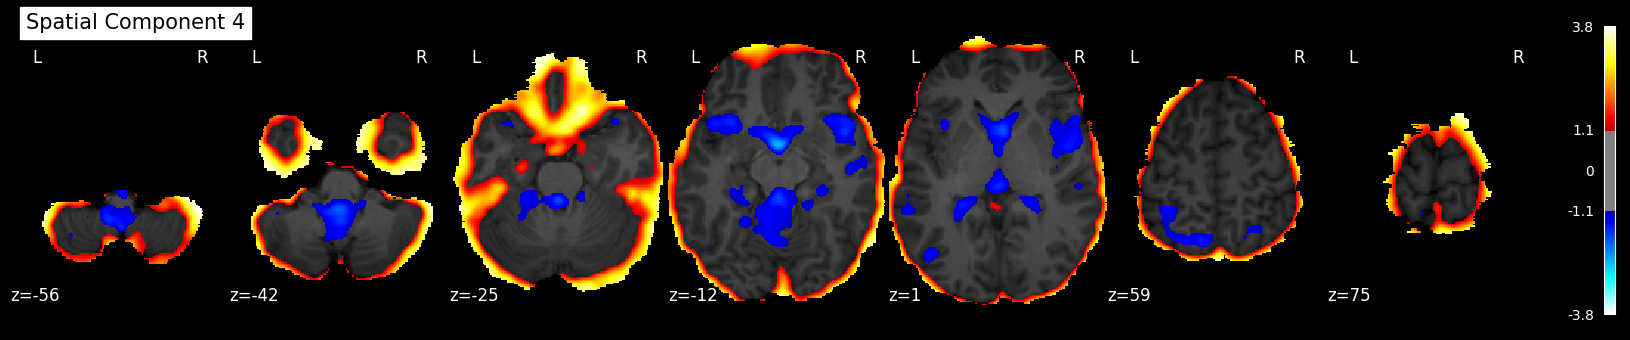

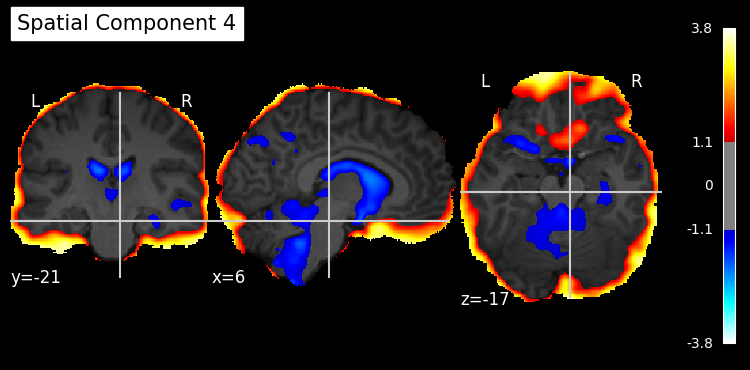

In [ ]:
desired_views = ['z', 'ortho']
for c in range(ica_comp):
  img = nib.Nifti1Image(icasig_space_r[...,c], T1w_img.affine)
  masked = masker.transform_single_imgs(img)
  img = masker.inverse_transform(masked)
  for view_ in desired_views:
    plot_stat_map(img, display_mode=view_, title=f'Spatial Component {c}',
                  colorbar=True, black_bg=True, bg_img=T1w_img, threshold=2*np.std(icasig_space_r[...,c]),)